In [2]:
import warnings
import pandas as pd
import numpy as np

# Load the data files

In [82]:
df_movietitle = pd.read_csv('movie_titles.txt',encoding = "ISO-8859-1", names = ['movieId', 'year', 'title'], sep =',')
df_movietitle["year"] = df_movietitle["year"].fillna(0.0).astype(int)
df_movietitle.describe()

,movieId,year
count,17770.000000,17770.000000
mean,8885.500000,1989.479685
std,5129.901477,42.804924
min,1.000000,0.000000
25%,4443.250000,1985.000000
50%,8885.500000,1997.000000
75%,13327.750000,2002.000000
max,17770.000000,2005.000000


Load and merge training and testing with movie title file 

In [84]:
df_training = pd.read_csv('TrainingRatings.txt',encoding = "ISO-8859-1", names = ['movieId', 'userId', 'rating'], sep =',')
# print (df_training.head(2))

df_training_final = df_movietitle.merge(df_training, on="movieId", how = 'inner')
df_training_final.describe()

,movieId,year,userId,rating
count,3.255352e+06,3.255352e+06,3.255352e+06,3.255352e+06
mean,8.724660e+03,1.991215e+03,1.327058e+06,3.481188e+00
std,5.107402e+03,1.289527e+01,7.626887e+05,1.082873e+00
min,8.000000e+00,1.916000e+03,7.000000e+00,1.000000e+00
25%,3.893000e+03,1.986000e+03,6.716970e+05,3.000000e+00
50%,8.825000e+03,1.995000e+03,1.322467e+06,4.000000e+00
75%,1.332600e+04,2.001000e+03,1.988873e+06,4.000000e+00
max,1.774200e+04,2.005000e+03,2.649285e+06,5.000000e+00


In [83]:
df_testing = pd.read_csv('TestingRatings.txt',encoding = "ISO-8859-1", names = ['movieId', 'userId', 'rating'], sep =',')
# print (df_training.head(2))

df_testing_final = df_movietitle.merge(df_testing, on="movieId", how = 'inner')
df_testing_final.describe()

,movieId,year,userId,rating
count,100478.000000,100478.000000,1.004780e+05,100478.000000
mean,8701.547792,1991.242829,1.329956e+06,3.479458
std,5098.075495,12.839269,7.625041e+05,1.085280
min,8.000000,1916.000000,7.000000e+00,1.000000
25%,3893.000000,1986.000000,6.774300e+05,3.000000
50%,8699.000000,1995.000000,1.325031e+06,4.000000
75%,13298.000000,2001.000000,1.995052e+06,4.000000
max,17742.000000,2005.000000,2.649285e+06,5.000000


In [85]:
# Check for duplicates
print(df_testing_final.duplicated(["movieId","year","title","userId", "rating"]).sum())
print(df_testing_final.duplicated(["movieId","year","title","userId", "rating"]).sum())
print(df_training_final.duplicated(["movieId","year","title","userId", "rating"]).sum())

0
0
0


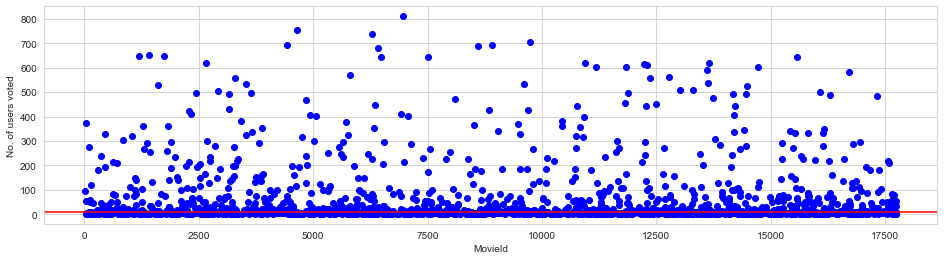

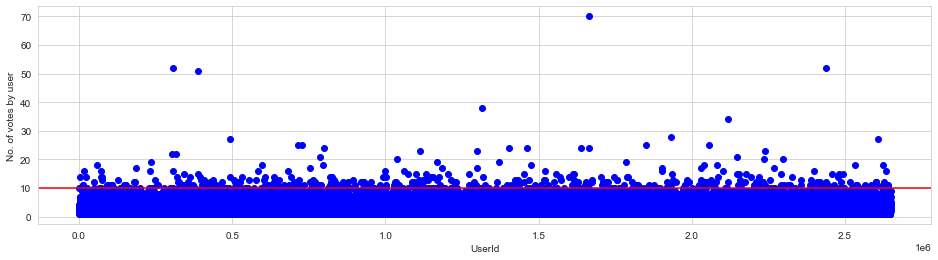

In [103]:
#visualize the how many users rates movies in the testing set
no_user_voted = df_testing_final.groupby('movieId')['rating'].agg('count')
no_movies_voted = df_testing_final.groupby('userId')['rating'].agg('count')
f,ax = plt.subplots(1,1,figsize=(16,4))
# ratings['rating'].plot(kind='hist')
plt.scatter(no_user_voted.index,no_user_voted,color='blue')
plt.axhline(y=10,color='r')
plt.xlabel('MovieId')
plt.ylabel('No. of users voted')
plt.show()

f,ax = plt.subplots(1,1,figsize=(16,4))
plt.scatter(no_movies_voted.index,no_movies_voted,color='blue')
plt.axhline(y=10,color='r')
plt.xlabel('UserId')
plt.ylabel('No. of votes by user')
plt.show()

In [9]:
#Find the number of user rated per movie:
no_users_per_movie = df_testing_final.groupby(("movieId"),as_index = False)["rating"].count()
print("No of movies rated per user in testing :""\n", no_users_per_movie.sort_values(by=['rating'],ascending = False).head(3))

no_users_per_movie_train = df_training_final.groupby(("movieId"),as_index = False)["rating"].count()
print("No of movies rated per user in training:""\n", no_users_per_movie_train.sort_values(by=['rating'],ascending = False).head(3))


No of movies rated per user in testing :
      movieId  rating
668     6971     811
452     4640     756
596     6287     737
No of movies rated per user in training:
      movieId  rating
705     6971   25468
629     6287   24393
478     4640   23525


<!-- #
user_id = int(pd.Series(df_testing_final.index).sample(1).values)
user_id
print("Random user from test set:", user_id)
# """
# SELECT *
# FROM table
# WHERE column_name = some_value
# """
 -->

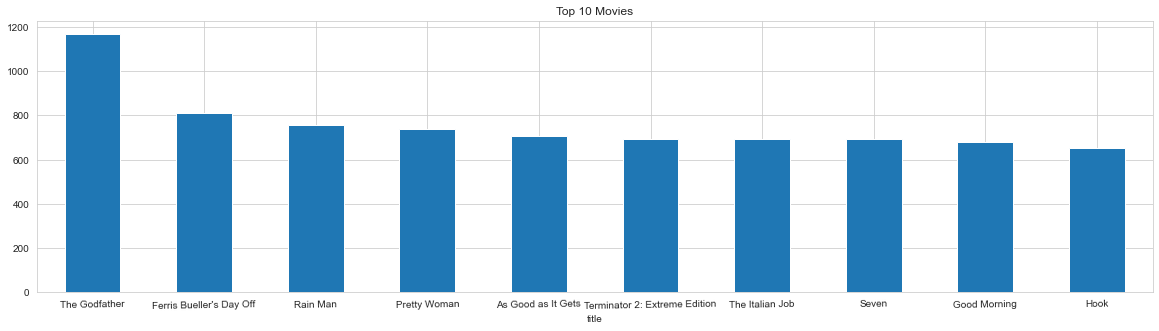

In [106]:
#Top 10 movies in testing set based on no of users rated.
most_rated = df_testing_final.groupby('title').size().sort_values(ascending=False)[:10]
ax = most_rated.plot.bar(x='title', y='rating', title='Top 10 Movies', rot=1, figsize=(20,5))

In [110]:
# sort by rating average in training set
movie_stat = df_training_final.groupby('title').agg({'rating': [np.size, np.mean]})
movie_stat.sort_values([('rating', 'mean')], ascending=False).head()

rating          
                                                     size      mean
title                                                              
Ghost in the Shell: Stand Alone Complex: 2nd Gig     62.0  4.500000
The Sopranos: Season 1                            10430.0  4.422819
The Best of Friends: Vol. 3                        3330.0  4.418619
The Best of Friends: Vol. 4                        3722.0  4.414831
The Sopranos: Season 3                             9579.0  4.410690

In [12]:
# movies that have been rated at least 100 times in the training set
atleast_100 = movie_stat['rating']['size'] >= 100
movie_stat[atleast_100].sort_values([('rating', 'mean')], ascending=False)[:5]

rating          
                                size      mean
title                                         
The Sopranos: Season 1       10430.0  4.422819
The Best of Friends: Vol. 3   3330.0  4.418619
The Best of Friends: Vol. 4   3722.0  4.414831
The Sopranos: Season 3        9579.0  4.410690
The Godfather                37983.0  4.407814

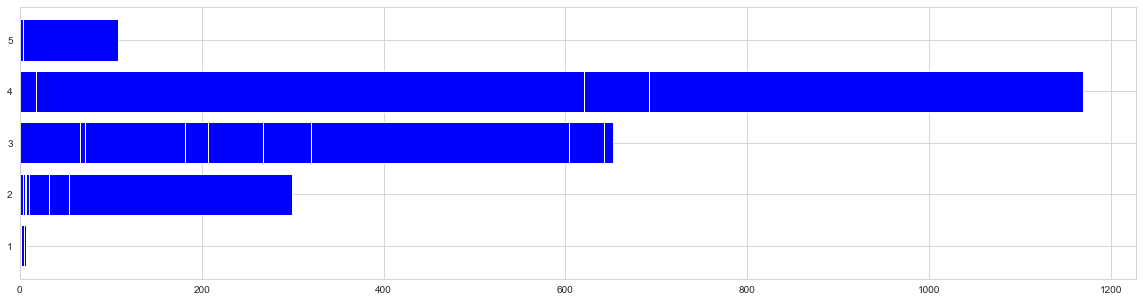

In [129]:
#plot rounded-up ratings with number of movies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
trend=pd.DataFrame(df_testing_final.groupby('title')['rating'].mean())
trend['total number of ratings'] = pd.DataFrame(df_testing_final.groupby('title')['rating'].count()) 
trend.head()

plt.figure(figsize =(20,5))
ax=plt.subplot()
ax.barh(trend['rating'].round(),trend['total number of ratings'],color='b')
plt.show()

<ipython-input-133-46faf62a786e>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(trend.index,rotation=40,fontsize='12',horizontalalignment="right")


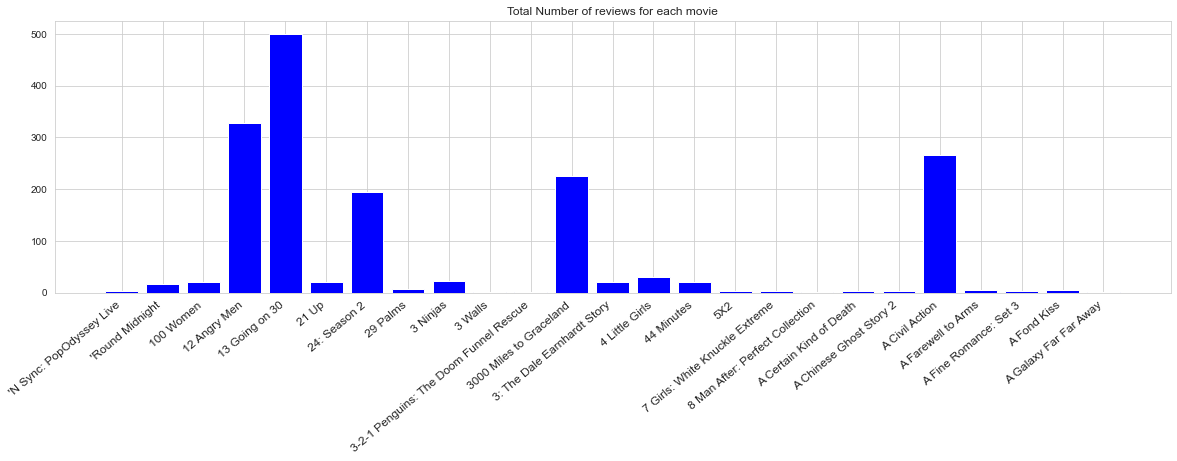

In [133]:
#bar graph describing number of reviews for first 25 movies
plt.figure(figsize =(20, 5))
ax=plt.subplot()
ax.bar(trend.head(25).index,trend['total number of ratings'].head(25),color='b')
ax.set_xticklabels(trend.index,rotation=40,fontsize='12',horizontalalignment="right")
ax.set_title("Total Number of reviews for each movie")
plt.show()

In [58]:
# Calculate mean rating of all movies and check the popular high rating movies
df_training_final.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Ghost in the Shell: Stand Alone Complex: 2nd Gig    4.500000
The Sopranos: Season 1                              4.422819
The Best of Friends: Vol. 3                         4.418619
The Best of Friends: Vol. 4                         4.414831
The Sopranos: Season 3                              4.410690
Name: rating, dtype: float64

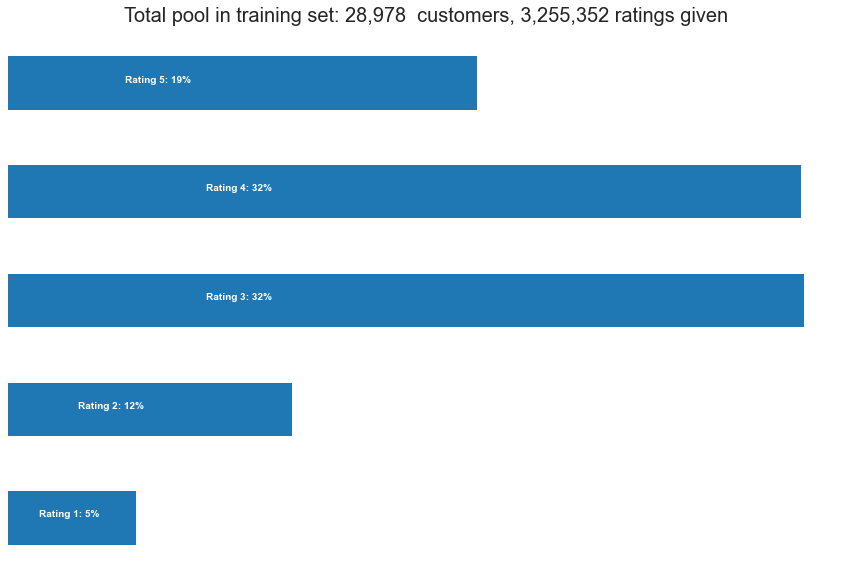

In [59]:
# get rating count
p = df_training_final.groupby('rating')['rating'].agg(['count'])

# get movie count
movie_count = df_training_final.isnull().sum()[1]

# get customer count
cust_count = df_training_final['userId'].nunique() - movie_count
rating_count = df_training_final['userId'].count() - movie_count

ax = p.plot(kind = 'barh', legend = False, figsize = (15,10))
plt.title('Total pool in training set: {:,}  customers, {:,} ratings given'.format( cust_count, rating_count), fontsize=20)
plt.axis('off')

for i in range(1,6):
    ax.text(p.iloc[i-1][0]/4, i-1, 'Rating {}: {:.0f}%'.format(i, p.iloc[i-1][0]*100 / p.sum()[0]), color = 'white', weight = 'bold')

In [60]:
from scipy import sparse
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
import xgboost as xgb

def get_user_item_sparse_matrix(df):
    sparse_data = sparse.csr_matrix((df.rating, (df.userId, df.movieId)))
    return sparse_data

train_sparse_data = get_user_item_sparse_matrix(df_training_final)
test_sparse_data = get_user_item_sparse_matrix(df_testing_final)

In [21]:
global_average_rating = train_sparse_data.sum()/train_sparse_data.count_nonzero()
print("Global Average Rating: {}".format(global_average_rating))

Global Average Rating: 3.481187595074204


In [23]:
def get_average_rating(sparse_matrix, is_user):
    ax = 1 if is_user else 0
    sum_of_ratings = sparse_matrix.sum(axis = ax).A1  
    no_of_ratings = (sparse_matrix != 0).sum(axis = ax).A1 
    rows, cols = sparse_matrix.shape
    average_ratings = {i: sum_of_ratings[i]/no_of_ratings[i] for i in range(rows if is_user else cols) if no_of_ratings[i] != 0}
    return average_ratings

In [24]:
average_rating_user = get_average_rating(train_sparse_data, True)
avg_rating_movie = get_average_rating(train_sparse_data, False)


In [25]:
train_users = len(np.unique(df_training_final["userId"]))
test_users = len(np.unique(df_testing_final["userId"]))
uncommonUsers = train_users - test_users
print("No. of in users in Train data = {}".format(train_users))
print("No. of Users in test data= {}".format(test_users))
print("No. of Users not present in test data = {}({}%)".format(uncommonUsers, np.round((uncommonUsers/train_users)*100), 2))

No. of in users in Train data = 28978
No. of Users in test data= 27555
No. of Users not present in test data = 1423(5.0%)


In [26]:
train_movies = len(np.unique(df_training_final["movieId"]))
test_movies = len(np.unique(df_testing_final["movieId"]))
uncommonMovies = train_movies - test_movies
print("No. of Movies in train data = {}".format(train_movies))
print("No. of Movies in test data= {}".format(test_movies))
print("No. of Movies not present in test data = {}({}%)".format(uncommonMovies, np.round((uncommonMovies/train_movies)*100), 2))


No. of Movies in train data = 1821
No. of Movies in test data= 1701
No. of Movies not present in test data = 120(7.0%)


C:\Users\Yamini\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
<ipython-input-61-3ce9454ab4a6>:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])


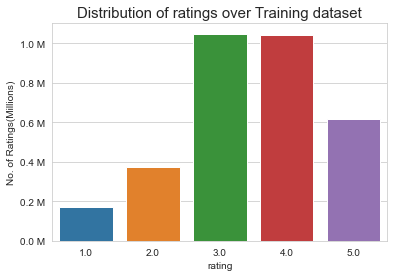

In [61]:
# Distribution of ratings over Training dataset
import seaborn as sns
sns.set_style('whitegrid')
def human(num, units = 'M'):
    units = units.lower()
    num = float(num)
    if units == 'k':
        return str(num/10**3) + " K"
    elif units == 'm':
        return str(num/10**6) + " M"
    elif units == 'b':
        return str(num/10**9) +  " B"
    
fig, ax = plt.subplots()
plt.title('Distribution of ratings over Training dataset', fontsize=15)
sns.countplot(df_training_final.rating)
ax.set_yticklabels([human(item, 'M') for item in ax.get_yticks()])
ax.set_ylabel('No. of Ratings(Millions)')
plt.show()

In [ ]:
# Analysing Number of ratings given by some user --> --> -->
no_of_rated_movies_per_user = df_training_final.groupby(by='userId')['rating'].count().sort_values(ascending=False)
no_of_rated_movies_per_user.head()

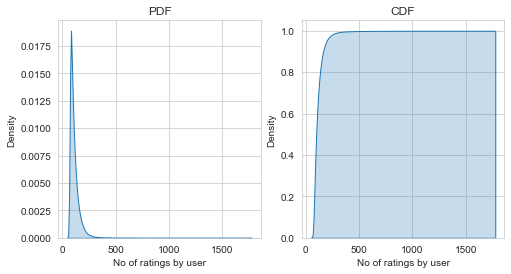

In [62]:
# probability density function (pdf) is the derivative of a cumulative distribution function (cdf)
fig = plt.figure(figsize=plt.figaspect(.5))

ax1 = plt.subplot(121)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, ax=ax1)
plt.xlabel('No of ratings by user')
plt.title("PDF")

ax2 = plt.subplot(122)
sns.kdeplot(no_of_rated_movies_per_user, shade=True, cumulative=True,ax=ax2)
plt.xlabel('No of ratings by user')
plt.title('CDF')

plt.show()

<ipython-input-63-15e5f9cb37d9>:16: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500)


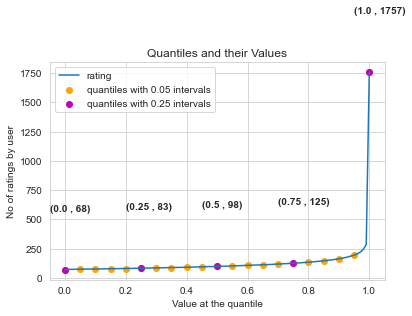

In [63]:
no_of_rated_movies_per_user.describe()
quantiles = no_of_rated_movies_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')

# annotate the 25th, 50th, 75th and 100th percentile values....
for x,y in zip(quantiles.index[::25], quantiles[::25]):
    plt.annotate(s="({} , {})".format(x,y), xy=(x,y), xytext=(x-0.05, y+500)
                ,fontweight='bold')


plt.show()

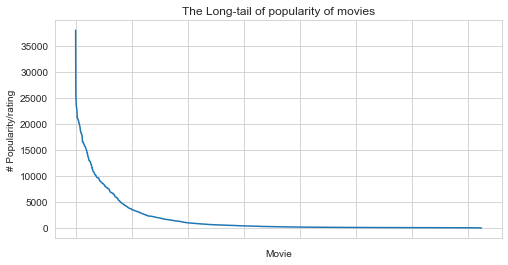

In [137]:
#Analysing Number of ratings that a movie got by users
no_of_ratings_per_movie = df_training_final.groupby(by='title')['rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_movie.values)
plt.title('The Long-tail of popularity of movies')
plt.xlabel('Movie')
plt.ylabel('# Popularity/rating')
ax.set_xticklabels([])

plt.show()

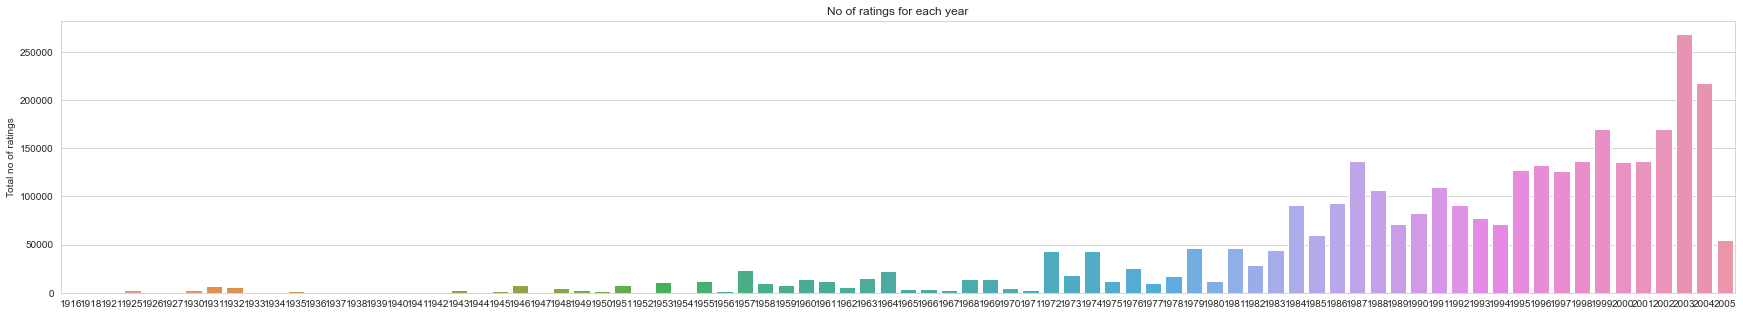

In [139]:
fig, ax = plt.subplots(figsize=(30,5))
sns.countplot(x='year', data=df_training_final, ax=ax)
plt.title('No of ratings for each year')
plt.ylabel('Total no of ratings')
plt.xlabel('')
plt.show()

Creating sparse matrix for Test Data

In [35]:
test_sparse_matrix = sparse.csr_matrix((df_testing_final.rating.values, (df_testing_final.userId.values,
                                               df_testing_final.movieId.values)))
  
print('Done. It\'s shape is : (user, movie) : ',test_sparse_matrix.shape)
us,mv = test_sparse_matrix.shape
elem = test_sparse_matrix.count_nonzero()

print("Sparsity Of Test matrix : {} % ".format(  (1-(elem/(us*mv))) * 100) )

Done. It's shape is : (user, movie) :  (2649286, 17743)
Sparsity Of Test matrix : 99.99978624558932 % 
